In [ ]:
import os
import pickle
import cv2
import numpy as np
import glob

In [ ]:
def get_class_weights(num_classes):
    if os.path.isfile('class_weights.p'):
        class_weights = pickle.load(open("class_weights.p", "rb"))
    else:
        class_weights_arr = np.zeros(num_classes)
        labels_list = sorted(glob.glob('data/train/labels/*'))

        for idx in range(len(labels_list)):
            img_weights = np.zeros(num_classes)
            img = cv2.imread(labels_list[idx], 0)
            for i in range(num_classes):
                if i == 19:
                    img_weights[i] = (img == 255).sum()
                else:    
                    img_weights[i] = (img == i).sum()
            img_weights = img_weights/(img.shape[0]*img.shape[1])
            class_weights_arr += img_weights
            
        class_weights_arr /= len(labels_list)
        
        class_weights = {}
        
        for i in range(num_classes):
            class_weights[i] = class_weights_arr[i]
            
        pickle.dump(class_weights, open("class_weights.p", "wb"))
        
    return class_weights  

In [ ]:
print(get_class_weights(20))

In [1]:
%matplotlib inline
import os
import cv2
import glob
import matplotlib.pyplot as plt
import random
import numpy as np
import label

In [2]:
def detail_images(image_file, label_file, labels):
    
    print('Image file:', image_file.split('/')[-1])
    print('Label file:', label_file.split('/')[-1])
    
    train_img = plt.imread(image_file)
    label_img = cv2.imread(label_file, 0)
    color_img = np.zeros(train_img.shape, np.uint8)
    
    for i in range(len(labels)):
        trainId = labels[i].trainId
        if trainId != 255:
            color = labels[i].color
            color_img[label_img == trainId] = color           
            
    print('Shapes of train, label, color:', 
          train_img.shape, label_img.shape, color_img.shape)
    print('Dtype of train, label, color:', 
          train_img.dtype, label_img.dtype, color_img.dtype)
    print('Max values of train, label, color:', 
         np.max(train_img), np.max(label_img), np.max(color_img))
    print('Min values of train, label, color:', 
         np.min(train_img), np.min(label_img), np.min(color_img)) 
    
    unique = np.unique(label_img)
    
    print('Classes in image:', unique)

    plt.figure(figsize=(9, 14))

    plt.subplot(3,1,1)
    plt.imshow(train_img)
    plt.axis('off')

    plt.subplot(3,1,2)
    plt.imshow(label_img)
    plt.axis('off')

    plt.subplot(3,1,3)
    plt.imshow(color_img)
    plt.axis('off')    
    
    plt.show()

In [3]:
images_train = sorted(glob.glob('Data/bdd100k/seg/images/train/*'))
labels_train = sorted(glob.glob('Data/bdd100k/seg/labels/train/*'))

print('No of images and Labels:', len(images_train), len(labels_train))

idx = random.randint(0, len(images_train))
print('Index:', idx)
detail_images(images_train[idx], labels_train[idx], 
              label.labels, 'bdd')

No of images and Labels: 0 0
Index: 0


IndexError: list index out of range

In [4]:
from label import labels

images_train = sorted(glob.glob('data/train/images/*'))
labels_train = sorted(glob.glob('data/train/labels/*'))

idx = 100

img = cv2.imread(images_train[idx])
label = cv2.imread(labels_train[idx], 0)

img = cv2.resize(img, (1280, 640))
label = cv2.resize(label, (1280, 640))

color_img = np.zeros(img.shape, np.uint8)

for i in range(len(labels)):
    trainId = labels[i].trainId
    if trainId != 255:
        color = labels[i].color
        color_img[label == trainId] = color  

cv2.imwrite('img.jpg', img)
cv2.imwrite('label.jpg', label)
cv2.imwrite('color_img.jpg', color_img)

True

In [5]:
import json

mapillary_dict = {}

with open('config.json') as config_file:
    config = json.load(config_file)
    labels = config['labels']
    #print((labels[0]))
    for label in labels:
        #print(label['color'], label['readable'])
        mapillary_dict[label['readable']] = label['color']
        
print(mapillary_dict)        
    

{'Bird': [165, 42, 42], 'Ground Animal': [0, 192, 0], 'Curb': [196, 196, 196], 'Fence': [190, 153, 153], 'Guard Rail': [180, 165, 180], 'Barrier': [90, 120, 150], 'Wall': [102, 102, 156], 'Bike Lane': [128, 64, 255], 'Crosswalk - Plain': [140, 140, 200], 'Curb Cut': [170, 170, 170], 'Parking': [250, 170, 160], 'Pedestrian Area': [96, 96, 96], 'Rail Track': [230, 150, 140], 'Road': [128, 64, 128], 'Service Lane': [110, 110, 110], 'Sidewalk': [244, 35, 232], 'Bridge': [150, 100, 100], 'Building': [70, 70, 70], 'Tunnel': [150, 120, 90], 'Person': [220, 20, 60], 'Bicyclist': [255, 0, 0], 'Motorcyclist': [255, 0, 100], 'Other Rider': [255, 0, 200], 'Lane Marking - Crosswalk': [200, 128, 128], 'Lane Marking - General': [255, 255, 255], 'Mountain': [64, 170, 64], 'Sand': [230, 160, 50], 'Sky': [70, 130, 180], 'Snow': [190, 255, 255], 'Terrain': [152, 251, 152], 'Vegetation': [107, 142, 35], 'Water': [0, 170, 30], 'Banner': [255, 255, 128], 'Bench': [250, 0, 30], 'Bike Rack': [100, 140, 180], 

In [6]:
import label

bdd = label.labels
bdd_dict = {label.name: label.trainId for label in bdd}
fil = []

for name in mapillary_dict:
    name = name.lower()
    if name not in bdd_dict:
        print('------>', name)
    else:
        fil.append(name)
        #print(name)
        
print(len(fil))  

for c in sorted(fil):
    print(c)

------> bird
------> ground animal
------> curb
------> barrier
------> bike lane
------> crosswalk - plain
------> curb cut
------> pedestrian area
------> service lane
------> bicyclist
------> motorcyclist
------> other rider
------> lane marking - crosswalk
------> lane marking - general
------> mountain
------> sand
------> snow
------> water
------> bench
------> bike rack
------> catch basin
------> cctv camera
------> fire hydrant
------> junction box
------> mailbox
------> manhole
------> phone booth
------> pothole
------> utility pole
------> traffic sign (back)
------> traffic sign (front)
------> trash can
------> boat
------> on rails
------> other vehicle
------> wheeled slow
------> car mount
29
banner
bicycle
billboard
bridge
building
bus
car
caravan
ego vehicle
fence
guard rail
motorcycle
parking
person
pole
rail track
road
sidewalk
sky
street light
terrain
traffic light
traffic sign frame
trailer
truck
tunnel
unlabeled
vegetation
wall


In [7]:
import json
import label

bdd = label.labels

mapillary_dict = {}

with open('config.json') as config_file:
    config = json.load(config_file)
    labels = config['labels']
    for label in labels:
        mapillary_dict[label['readable']] = label['color']        

bdd_dict = {label.name: label.trainId for label in bdd}

mapillary_trainId = {}

for name in mapillary_dict:
    
    l_name = name.lower()
    
    if l_name in ['motorcyclist', 'bicyclist']:
        l_name = 'rider'
    elif l_name in ['traffic sign (back)', 'traffic sign (front)']:
        l_name = 'traffic sign'
    
    if l_name in bdd_dict:
        mapillary_trainId[name] = [bdd_dict[l_name], mapillary_dict[name]]
    else:
        mapillary_trainId[name] = [255, mapillary_dict[name]]

print(mapillary_trainId) 

{'Bird': [255, [165, 42, 42]], 'Ground Animal': [255, [0, 192, 0]], 'Curb': [255, [196, 196, 196]], 'Fence': [4, [190, 153, 153]], 'Guard Rail': [255, [180, 165, 180]], 'Barrier': [255, [90, 120, 150]], 'Wall': [3, [102, 102, 156]], 'Bike Lane': [255, [128, 64, 255]], 'Crosswalk - Plain': [255, [140, 140, 200]], 'Curb Cut': [255, [170, 170, 170]], 'Parking': [255, [250, 170, 160]], 'Pedestrian Area': [255, [96, 96, 96]], 'Rail Track': [255, [230, 150, 140]], 'Road': [0, [128, 64, 128]], 'Service Lane': [255, [110, 110, 110]], 'Sidewalk': [1, [244, 35, 232]], 'Bridge': [255, [150, 100, 100]], 'Building': [2, [70, 70, 70]], 'Tunnel': [255, [150, 120, 90]], 'Person': [11, [220, 20, 60]], 'Bicyclist': [12, [255, 0, 0]], 'Motorcyclist': [12, [255, 0, 100]], 'Other Rider': [255, [255, 0, 200]], 'Lane Marking - Crosswalk': [255, [200, 128, 128]], 'Lane Marking - General': [255, [255, 255, 255]], 'Mountain': [255, [64, 170, 64]], 'Sand': [255, [230, 160, 50]], 'Sky': [10, [70, 130, 180]], 'Sno

In [8]:
import json
import label

bdd = label.labels

mapillary_dict = {}

with open('config.json') as config_file:
    config = json.load(config_file)
    labels = config['labels']
    for idx, label in enumerate(labels):
        mapillary_dict[label['readable']] = idx        

bdd_dict = {label.name: label.trainId for label in bdd}

mapillary_trainId = {}

for name in mapillary_dict:
    
    l_name = name.lower()
    
    if l_name in ['motorcyclist', 'bicyclist']:
        l_name = 'rider'
    elif l_name in ['traffic sign (back)', 'traffic sign (front)']:
        l_name = 'traffic sign'
    
    if l_name in bdd_dict:
        mapillary_trainId[mapillary_dict[name]] = bdd_dict[l_name]
    else:
        mapillary_trainId[mapillary_dict[name]] = 255

print(mapillary_trainId)    

{0: 255, 1: 255, 2: 255, 3: 4, 4: 255, 5: 255, 6: 3, 7: 255, 8: 255, 9: 255, 10: 255, 11: 255, 12: 255, 13: 0, 14: 255, 15: 1, 16: 255, 17: 2, 18: 255, 19: 11, 20: 12, 21: 12, 22: 255, 23: 255, 24: 255, 25: 255, 26: 255, 27: 10, 28: 255, 29: 9, 30: 8, 31: 255, 32: 255, 33: 255, 34: 255, 35: 255, 36: 255, 37: 255, 38: 255, 39: 255, 40: 255, 41: 255, 42: 255, 43: 255, 44: 255, 45: 5, 46: 255, 47: 255, 48: 6, 49: 7, 50: 7, 51: 255, 52: 18, 53: 255, 54: 15, 55: 13, 56: 255, 57: 17, 58: 255, 59: 255, 60: 255, 61: 14, 62: 255, 63: 255, 64: 255, 65: 255}


In [9]:
mapillary_dict = {}

with open('config.json') as config_file:
    config = json.load(config_file)
    labels = config['labels']
    for idx, label in enumerate(labels):
        name = label['readable']
        l_name = name.lower()
        if l_name in ['motorcyclist', 'bicyclist']:
            l_name = 'rider'
        elif l_name in ['traffic sign (back)', 'traffic sign (front)']:
            l_name = 'traffic sign' 
        
        if l_name in bdd_dict:
            mapillary_dict[idx] = bdd_dict[l_name]
        else:
            mapillary_dict[idx] = 255    
            
print(mapillary_dict)            

{0: 255, 1: 255, 2: 255, 3: 4, 4: 255, 5: 255, 6: 3, 7: 255, 8: 255, 9: 255, 10: 255, 11: 255, 12: 255, 13: 0, 14: 255, 15: 1, 16: 255, 17: 2, 18: 255, 19: 11, 20: 12, 21: 12, 22: 255, 23: 255, 24: 255, 25: 255, 26: 255, 27: 10, 28: 255, 29: 9, 30: 8, 31: 255, 32: 255, 33: 255, 34: 255, 35: 255, 36: 255, 37: 255, 38: 255, 39: 255, 40: 255, 41: 255, 42: 255, 43: 255, 44: 255, 45: 5, 46: 255, 47: 255, 48: 6, 49: 7, 50: 7, 51: 255, 52: 18, 53: 255, 54: 15, 55: 13, 56: 255, 57: 17, 58: 255, 59: 255, 60: 255, 61: 14, 62: 255, 63: 255, 64: 255, 65: 255}


In [10]:
ls

bdd100k/
bdd100k_seg.zip
cityscapes_label.py
color_img.jpg
config.json*
data/
Data Inspection after preparing data.ipynb
gtFine_trainvaltest/
gtFine_trainvaltest.zip
img.jpg
Initial Data Inspection Demo.ipynb
label.jpg
label.py
leftImg8bit_trainvaltest/
leftImg8bit_trainvaltest.zip
mapillary-vistas-dataset_public_v1.1/
model.py
Prepare Data.ipynb
__pycache__/
Test.ipynb
test.py*
train.py*
utils.py


In [12]:
mapillary_dict = {}

with open('config.json') as config_file:
    config = json.load(config_file)
    labels = config['labels']
    for idx, label in enumerate(labels):
        name = label['readable']
        l_name = name.lower()
        if l_name in ['motorcyclist', 'bicyclist']:
            l_name = 'rider'
        elif l_name in ['traffic sign (back)', 'traffic sign (front)']:
            l_name = 'traffic sign' 
        
        if l_name in bdd_dict:
            mapillary_dict[idx] = bdd_dict[l_name]
        else:
            mapillary_dict[idx] = 255    
            
print(mapillary_dict) 

{0: 255, 1: 255, 2: 255, 3: 4, 4: 255, 5: 255, 6: 3, 7: 255, 8: 255, 9: 255, 10: 255, 11: 255, 12: 255, 13: 0, 14: 255, 15: 1, 16: 255, 17: 2, 18: 255, 19: 11, 20: 12, 21: 12, 22: 255, 23: 255, 24: 255, 25: 255, 26: 255, 27: 10, 28: 255, 29: 9, 30: 8, 31: 255, 32: 255, 33: 255, 34: 255, 35: 255, 36: 255, 37: 255, 38: 255, 39: 255, 40: 255, 41: 255, 42: 255, 43: 255, 44: 255, 45: 5, 46: 255, 47: 255, 48: 6, 49: 7, 50: 7, 51: 255, 52: 18, 53: 255, 54: 15, 55: 13, 56: 255, 57: 17, 58: 255, 59: 255, 60: 255, 61: 14, 62: 255, 63: 255, 64: 255, 65: 255}


18000 18000 18000 18000
[201 224 172] 17 [70 70 70] 138 2 [70 70 70]
(2448, 3264, 3) (2448, 3264) (2448, 3264, 3) (2448, 3264) (2448, 3264) (2448, 3264, 3)
uint8 uint8 uint8 uint8 uint8 uint8
255 65 255 198 255 255
0 2 0 0 0 0
Classes in cnv_id image: [  0   1   2   4   5   6   7   8  10  11  12  13  14  15  18 255]
Classes in instance image: [ 2  3  7 11 13 15 17 19 20 23 24 27 30 35 41 44 45 48 50 52 54 55 61 65]


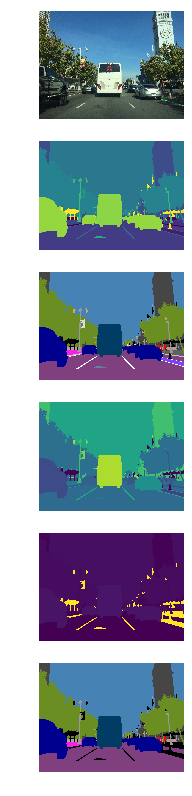

In [62]:
from skimage import img_as_ubyte

images_train = sorted(glob.glob('mapillary-vistas-dataset_public_v1.1/training/images/*'))
instances_train = sorted(glob.glob('mapillary-vistas-dataset_public_v1.1/training/instances/*'))
labels_train = sorted(glob.glob('mapillary-vistas-dataset_public_v1.1/training/labels/*'))
panoptic_train = sorted(glob.glob('mapillary-vistas-dataset_public_v1.1/training/panoptic/*.png'))


print(len(images_train), len(instances_train), len(labels_train), 
      len(panoptic_train))

idx = 100

img = plt.imread(images_train[idx])
instance = cv2.imread(instances_train[idx], 0)
label = plt.imread(labels_train[idx])
label = img_as_ubyte(label)
panoptic = cv2.imread(panoptic_train[idx], 0)
cnv_id = np.zeros(instance.shape, np.uint8)
cnv_color = np.zeros(img.shape, np.uint8)

for Id in mapillary_dict:
    trainId = mapillary_dict[Id]
    cnv_id[instance == Id] = trainId

for i in range(len(bdd)):
    trainId = bdd[i].trainId
    if trainId != 255:
        color = bdd[i].color
        cnv_color[cnv_id == trainId] = color     
        
cv2.imwrite('label.jpg', cv2.resize(cnv_id, (1280, 720), 
                         interpolation=cv2.INTER_NEAREST))

# cnv_id_save = Image.fromarray(cnv_id)
# cnv_id_save.save('label.jpg')


    
print(img[0,0], instance[0,0], label[0,0], panoptic[0,0], cnv_id[0,0],
      cnv_color[0,0])
print(img.shape, instance.shape, label.shape, panoptic.shape, 
      cnv_id.shape, cnv_color.shape)
print(img.dtype, instance.dtype, label.dtype, panoptic.dtype, 
      cnv_id.dtype, cnv_color.dtype)
print(np.max(img), np.max(instance), np.max(label), np.max(panoptic), 
      np.max(cnv_id), np.max(cnv_color))
print(np.min(img), np.min(instance), np.min(label), np.min(panoptic), 
      np.min(cnv_id), np.min(cnv_color))

unique = np.unique(cnv_id)
print('Classes in cnv_id image:', unique)

unique = np.unique(instance)
print('Classes in instance image:', unique)

plt.figure(figsize=(9, 14))

plt.subplot(6,1,1)
plt.imshow(img)
plt.axis('off')

plt.subplot(6,1,2)
plt.imshow(instance)
plt.axis('off')

plt.subplot(6,1,3)
plt.imshow(label)
plt.axis('off')    

plt.subplot(6,1,4)
plt.imshow(panoptic)
plt.axis('off')

plt.subplot(6,1,5)
plt.imshow(cnv_id)
plt.axis('off')

plt.subplot(6,1,6)
plt.imshow(cnv_color)
plt.axis('off')

plt.show()

(2448, 3264)
Classes in label image: [  0   1   2   4   5   6   7   8  10  11  12  13  14  15  18 255]


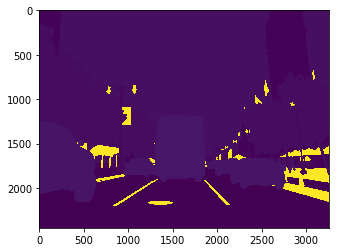

In [70]:
img = cv2.imread('label.png', 0)
print(img.shape)
unique, counts = np.unique(img, return_counts=True)
print('Classes in label image:', unique) 
plt.imshow(img)
plt.show()

In [53]:
x, y = np.where(img == 247)

In [54]:
img[x, y]

array([247], dtype=uint8)

In [41]:
from PIL import Image

img = Image.open('label.jpg')
img = np.array(img)
unique = np.unique(img)
print('Classes in label image:', unique) 
print(img.shape)

Classes in label image: [0]
(720, 1280)


In [40]:
img = Image.fromarray(img)
img.save('pil.jpg')